In [2]:
import os
import xarray as xr

# ENSO maps

In [5]:
# Output folder
outputdir='./output/netcdf'

# Open regression maps
icon_ssp370 = os.path.join(outputdir, 'teleconnections_ENSO_regression_ICON_ssp370_lra-r100-monthly.nc')
icon_ssp370 = xr.open_mfdataset(icon_ssp370)

ifs_nemo_ssp370 = os.path.join(outputdir, 'teleconnections_ENSO_regression_IFS-NEMO_ssp370_lra-r100-monthly.nc')
ifs_nemo_ssp370 = xr.open_mfdataset(ifs_nemo_ssp370)

era5 = os.path.join(outputdir, 'teleconnections_ENSO_regression_ERA5_era5_monthly.nc')
era5 = xr.open_mfdataset(era5)

In [11]:
# Open concordance masks
icon_ssp370_concordance = os.path.join(outputdir, 'teleconnections_ENSO_confidence_mask_ICON_ssp370_lra-r100-monthly.nc')
icon_ssp370_concordance = xr.open_mfdataset(icon_ssp370_concordance)

ifs_nemo_ssp370_concordance = os.path.join(outputdir, 'teleconnections_ENSO_confidence_mask_IFS-NEMO_ssp370_lra-r100-monthly.nc')
ifs_nemo_ssp370_concordance = xr.open_mfdataset(ifs_nemo_ssp370_concordance)

OSError: no files to open

TypeError: string indices must be integers, not 'str'

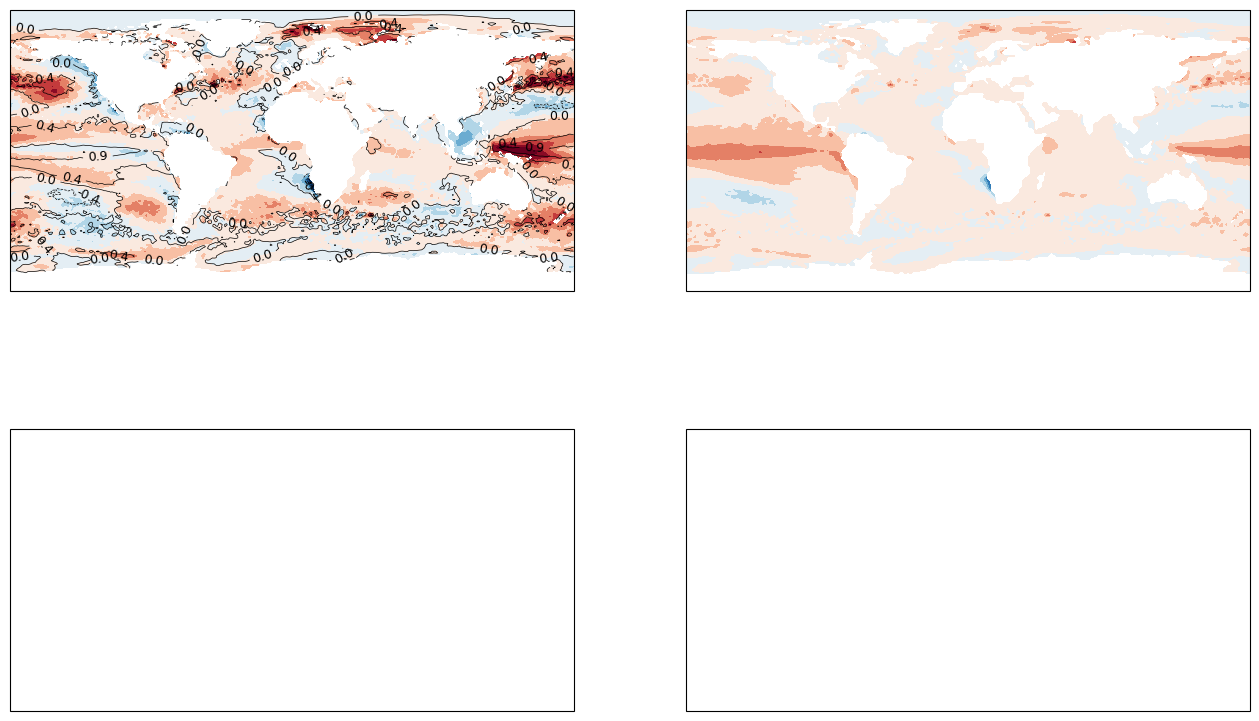

In [7]:
# Build a 2x2 figure, with the following subplots:
# ICON ssp - era5 regression map (top left)
# ICON ssp regression map (top right)
# IFS-NEMO ssp - era5 regression map (bottom left)
# IFS-NEMO ssp regression map (bottom right)
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from aqua.util import add_cyclic_lon, evaluate_colorbar_limits

# Set plot parameters
proj = ccrs.PlateCarree()
nlevels_fill = 11
nlevels_line = 11
contour_linewidth = 0.5
contour_fontsize = 9
title_fontsize = 14
cbar_fontsize = 12
ticks_fontsize = 10

fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 2, 1, projection=proj)
ax2 = fig.add_subplot(2, 2, 2, projection=proj)
ax3 = fig.add_subplot(2, 2, 3, projection=proj)
ax4 = fig.add_subplot(2, 2, 4, projection=proj)

# There is still a bug in the xarray saving function not preserving the variable name, to be fixed
diff_icon = icon_ssp370['__xarray_dataarray_variable__'] - era5['__xarray_dataarray_variable__']
diff_ifs_nemo = ifs_nemo_ssp370['__xarray_dataarray_variable__'] - era5['__xarray_dataarray_variable__']

vmin_reg = -2.2
vmax_reg = 2.2
vmin_diff = -1.0
vmax_diff = 1.0
levels_fill_reg = np.linspace(vmin_reg, vmax_reg, nlevels_fill)
levels_fill_diff = np.linspace(vmin_diff, vmax_diff, nlevels_fill)
levels_line = np.linspace(vmin_reg, vmax_reg, nlevels_line)

# ICON ssp - era5 regression map
lon, lat = np.meshgrid(diff_icon['lon'], diff_icon['lat'])
diff_icon = add_cyclic_lon(diff_icon)
diff_icon = ax1.contourf(lon, lat, diff_icon, levels=levels_fill_diff,
                         cmap='RdBu_r', transform=proj, transform_first=True,
                         extend='both')
icon_contour = ax1.contour(lon, lat, icon_ssp370['__xarray_dataarray_variable__'],
            levels=levels_line, colors='k', transform=proj, transform_first=True, linewidths=contour_linewidth)
ax1.clabel(icon_contour, fmt='%1.1f', fontsize=contour_fontsize, inline=True)

# ICON ssp regression map
lon, lat = np.meshgrid(icon_ssp370['lon'], icon_ssp370['lat'])
icon_ssp370_plot = add_cyclic_lon(icon_ssp370['__xarray_dataarray_variable__'])
icon_ssp370_plot = ax2.contourf(lon, lat, icon_ssp370_plot, levels=levels_fill_reg,
                                cmap='RdBu_r', transform=proj, transform_first=True,
                                extend='both')
icon_concordance_plot = add_cyclic_lon(icon_ssp370_concordance['avg_tos'])
icon_concordance_plot.where(icon_concordance_plot == 1).plot.contourf(levels=[0, 1],
                            colors='none', hatches=['....', ''], add_colorbar=False, ax=ax2)


# IFS-NEMO ssp - era5 regression map
lon, lat = np.meshgrid(diff_ifs_nemo['lon'], diff_ifs_nemo['lat'])
diff_ifs_nemo = add_cyclic_lon(diff_ifs_nemo)
diff_ifs_nemo = ax3.contourf(lon, lat, diff_ifs_nemo, levels=levels_fill_diff,
                                cmap='RdBu_r', transform=proj, transform_first=True,
                                extend='both')
ifs_nemo_contour = ax3.contour(lon, lat, ifs_nemo_ssp370['__xarray_dataarray_variable__'],
            levels=levels_line, colors='k', transform=proj, transform_first=True, linewidths=contour_linewidth)
ax3.clabel(ifs_nemo_contour, fmt='%1.1f', fontsize=contour_fontsize, inline=True)

# IFS-NEMO ssp regression map
lon, lat = np.meshgrid(ifs_nemo_ssp370['lon'], ifs_nemo_ssp370['lat'])
ifs_nemo_ssp370_plot = add_cyclic_lon(ifs_nemo_ssp370['__xarray_dataarray_variable__'])
ifs_nemo_ssp370_plot = ax4.contourf(lon, lat, ifs_nemo_ssp370_plot, levels=levels_fill_reg,
                                    cmap='RdBu_r', transform=proj, transform_first=True,
                                    extend='both')
ifs_nemo_concordance_plot = add_cyclic_lon(ifs_nemo_ssp370_concordance['avg_tos'])
ifs_nemo_concordance_plot.where(ifs_nemo_concordance_plot == 1).plot.contourf(levels=[0, 1],
                                colors='none', hatches=['....', ''], add_colorbar=False, ax=ax4)

# Set titles
ax1.set_title('ICON ssp370 - ERA5 regression map', fontsize=title_fontsize)
ax2.set_title('ICON ss370 regression map', fontsize=title_fontsize)
ax3.set_title('IFS-NEMO ssp370 - ERA5 regression map', fontsize=title_fontsize)
ax4.set_title('IFS-NEMO ssp370 regression map', fontsize=title_fontsize)

# Coastlines
for ax in [ax1, ax2, ax3, ax4]:
    ax.coastlines()
    ax.set_xticks(np.arange(-180, 181, 60), crs=proj)
    ax.set_yticks(np.arange(-90, 91, 30), crs=proj)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=ticks_fontsize)

fig.subplots_adjust(bottom=0.15, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Common horizontal colorbar for ax1, ax3 under the subplots
cbar_ax1 = fig.add_axes([0.065, 0.05, 0.4, 0.02])
cbar_ticks1 = levels_fill_diff
cbar1 = fig.colorbar(diff_icon, cax=cbar_ax1, orientation='horizontal', label='avg_tos [K]')

# Common horizontal colorbar for ax2, ax4 under the subplots
cbar_ax2 = fig.add_axes([0.53, 0.05, 0.4, 0.02])
cbar_ticks2 = levels_fill_reg
cbar2 = fig.colorbar(icon_ssp370_plot, cax=cbar_ax2, orientation='horizontal', label='avg_tos [K]')

# Save the image
plt.savefig('deliverable_teleconnections.png', dpi=300)